In [1]:
import kex_data
import filefit as ff

In [2]:
hdrs = kex_data.get_sino_hdrs()
mhdrs = kex_data.get_sino_mainhdrs()
for h,m in zip(hdrs, mhdrs):
    filling = [h,m]
    mc_dir = r"C:/Users/petct/Desktop/Hugo/Code/PythonMEX/motion_corrected"
    ff.prep_folder(mc_dir, filling)

In [3]:
mc_v_paths=ff.get_path_selection(mc_dir, '.v')[ : :-1]
print("paths:", mc_v_paths)

paths: ['C:/Users/petct/Desktop/Hugo/Code/PythonMEX/motion_corrected/cylinder_000_000.v', 'C:/Users/petct/Desktop/Hugo/Code/PythonMEX/motion_corrected/cannula_000_000.v']


In [4]:
import kex_headers

In [5]:
mc_recons = [ff.get_v_data(path) for path in mc_v_paths]
mc_recons = dict(zip(kex_data.PHANTOM_KEYS, mc_recons))

In [6]:
gated_recons = kex_data.get_v_data()
ref_recons = {pkey: 
              gated_recons[pkey+" 0"] for pkey in kex_data.PHANTOM_KEYS}

In [7]:
import volume_view as vv

In [8]:
import volume_view as vv
import visual
import matplotlib.pyplot as plt
def my_plot(img_dict, pos = [47,120,100]):
    nims = len(img_dict)
    fig, axes = plt.subplots(nrows=nims, ncols=3, figsize=(20, 7*nims))
    for (key,img), row in zip(img_dict.items(), axes):
        dimlabels = 'zyx'
        views = vv.plot_views(img, 
                      position=pos,
                      axes=row, 
                      dimlabels=dimlabels, 
                      img_title=key)
        visual.same_colorbar(fig, views, row)

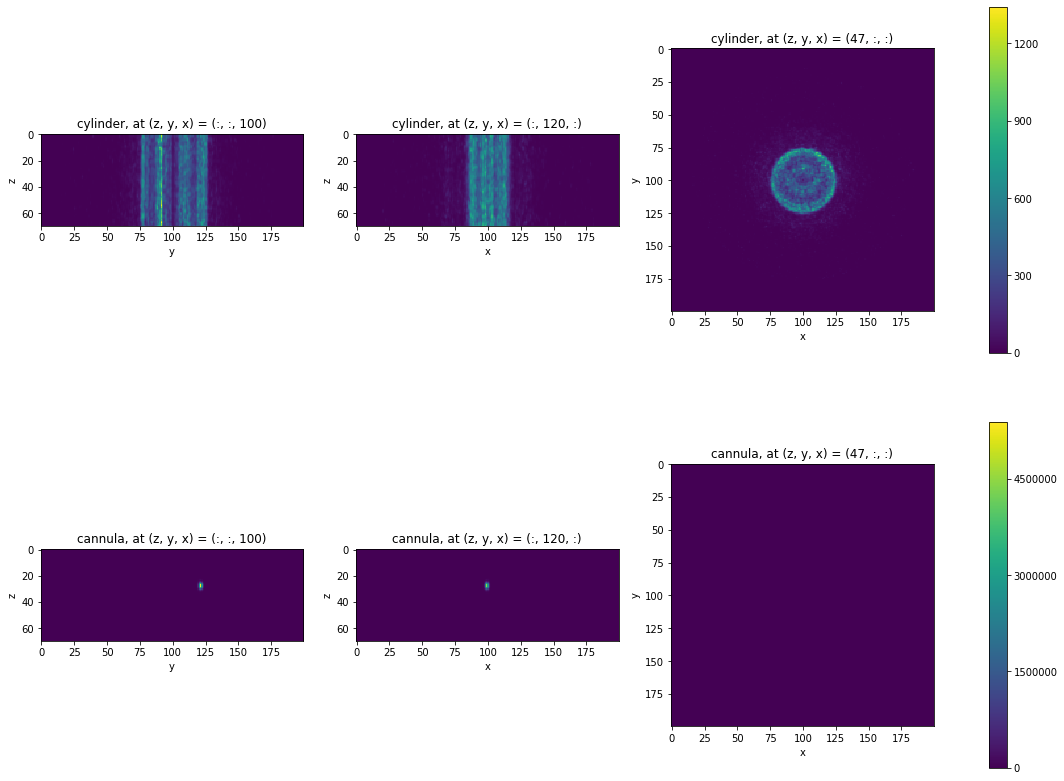

In [9]:
my_plot({k: v[20:90] for k,v in mc_recons.items()})

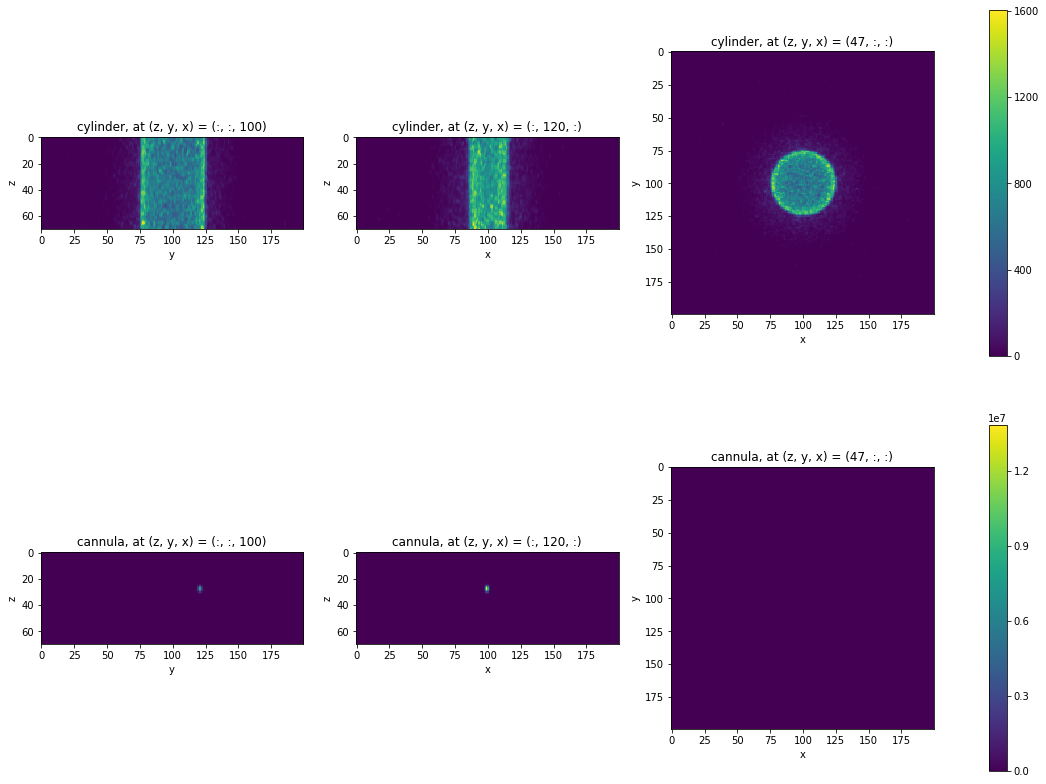

In [10]:
my_plot({k: v[20:90] for k,v in ref_recons.items()})

In [11]:
cylinders = [d['cylinder'] for d in [mc_recons, ref_recons]]
cannulas = [d['cannula'] for d in [mc_recons, ref_recons]]

In [12]:
import numpy as np
cylinder_vars = []
for image in cylinders:
    crop= image[20:90]
    var = [np.mean(np.var(crop, axis=ax )) for ax in range(3)]
    cylinder_vars.append(var)
cylinder_vars = np.array(cylinder_vars).T
print(cylinder_vars)

[[  206.16006   737.69946]
 [ 7192.3887  25101.893  ]
 [ 7170.071   25084.283  ]]


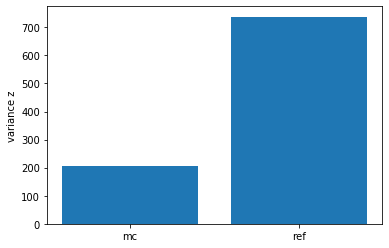

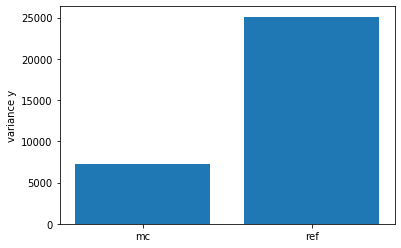

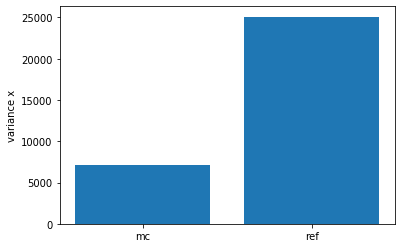

In [14]:
import matplotlib.pyplot as plt
dims = 'zyx'
for dim in range(3):
    plt.bar(["mc", "ref"], cylinder_vars[dim])
    plt.ylabel("variance " + dims[dim])
    plt.show()